In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('./Synthetic.csv')

In [3]:
data.head()

,Unnamed: 0,X,Y
0,0,37.454012,126.746701
1,1,95.071431,293.927975
2,2,73.199394,225.441700
3,3,59.865848,183.586508
4,4,15.601864,39.020372


In [4]:
data = data.drop(columns = 'Unnamed: 0')

In [5]:
data.head()

,X,Y
0,37.454012,126.746701
1,95.071431,293.927975
2,73.199394,225.441700
3,59.865848,183.586508
4,15.601864,39.020372


In [6]:
m= (data.shape[0])
X =  data['X'].values
y_true = data['Y'].values

In [7]:
X.shape,y_true.shape

((50,), (50,))

In [8]:
X = (X-np.mean(X))/np.std(X)
X = X.reshape((1,-1))
X.shape

y_true = y_true.reshape((-1,1))
print(y_true.shape)
Y=y_true

(50, 1)


In [33]:
def mse(y_true, X, b, w):
    predictions = np.dot(w,X) + b
    return np.mean((y_true - predictions) ** 2) / 2

In [34]:
theta0,theta1=0,0

In [35]:
theta0,theta1 = np.array([theta0]).reshape((1,1)),np.array([theta1]).reshape((1,1))

In [94]:
a=np.random.permutation(X.shape[1])
print(a)

[33 41 25 14 37 45 32 29  0 17 10 34 24 40 38 22 49 42 19  7 35 46 47 18
 39 28 21 26  9  8 27  2 44 12 16 23 48 30  4 13 31 36  3 11 20 15 43  5
  1  6]


In [93]:
def shuffle_data(X, Y):
    perm = np.random.permutation(X.shape[0])
    return X[perm].T, Y[perm]

In [80]:
def gradient_descent(X, Y, tol, iterations, w, b, alpha, batch_size):
    j = 0
    m = X.shape[1]
    e=[]
    X,Y = shuffle_data(X.T,Y)
    print(X.shape,Y.shape)

    while j < iterations:
        for i in range(0, m - batch_size + 1, batch_size):
            X_batch = X[: , i:i + batch_size]
            Y_batch = Y[i:i + batch_size , :]

            y_hat = w * X_batch + b
            dw = np.mean(np.dot(X_batch,(y_hat.T - Y_batch)))
            db = np.mean(y_hat.T - Y_batch)

            r = mse(Y_batch.T, X_batch, b, w)

            w_new = w - alpha * dw
            b_new = b - alpha * db

            r_new = mse(Y_batch.T, X_batch, b_new, w_new)

            if abs(r - r_new) < tol:
                print(f"Early stopping at iteration {j}")
                print("=" * 30)
                print(f"Final Slope: {float(w_new.item()):.5f}, Intercept: {float(b_new.item()):.5f}, MSE: {float(r_new.item()):.5f}")
                return w_new, b_new, e

            w, b = w_new, b_new
            j += 1

            e.append(r)

            print(f"Iter: {j} | Batch MSE: {float(r.item()):.5f} | w: {float(w.item()):.5f}, b: {float(b.item()):.5f}")

    print("=" * 90)
    print(f"Final Slope: {float(w.item()):.5f}, Intercept: {float(b.item()):.5f}, MSE: {float(r.item()):.5f} after {j} iterations")
    return w, b, e


In [95]:
g=gradient_descent(X,Y,tol=0.001,iterations=1000,w=theta0,b=theta1,alpha=0.01,batch_size=1) #For stochastic batch_size is 1 and for mini_batch its >1 and <len

(1, 50) (50, 1)
Iter: 1 | Batch MSE: 16852.00302 | w: 0.98049, b: 1.83587
Iter: 2 | Batch MSE: 32425.75967 | w: 4.20825, b: 4.38246
Iter: 3 | Batch MSE: 28774.42504 | w: 7.45055, b: 6.78140
Iter: 4 | Batch MSE: 16541.14059 | w: 8.47847, b: 8.60025
Iter: 5 | Batch MSE: 613.75952 | w: 8.05182, b: 8.95061
Iter: 6 | Batch MSE: 10183.06918 | w: 8.10245, b: 10.37771
Iter: 7 | Batch MSE: 557.02922 | w: 7.62214, b: 10.71148
Iter: 8 | Batch MSE: 4642.19583 | w: 7.35407, b: 11.67504
Iter: 9 | Batch MSE: 932.96807 | w: 6.89121, b: 12.10700
Iter: 10 | Batch MSE: 11615.05539 | w: 7.28637, b: 13.63115
Iter: 11 | Batch MSE: 27340.65939 | w: 10.06037, b: 15.96955
Iter: 12 | Batch MSE: 2261.70039 | w: 9.41269, b: 16.64211
Iter: 13 | Batch MSE: 11615.19459 | w: 9.77676, b: 18.16626
Iter: 14 | Batch MSE: 588.96986 | w: 9.38805, b: 18.50948
Iter: 15 | Batch MSE: 1887.59536 | w: 8.82403, b: 19.12390
Iter: 16 | Batch MSE: 29.53694 | w: 8.71667, b: 19.20076
Iter: 17 | Batch MSE: 6019.42787 | w: 8.44279, b: 2

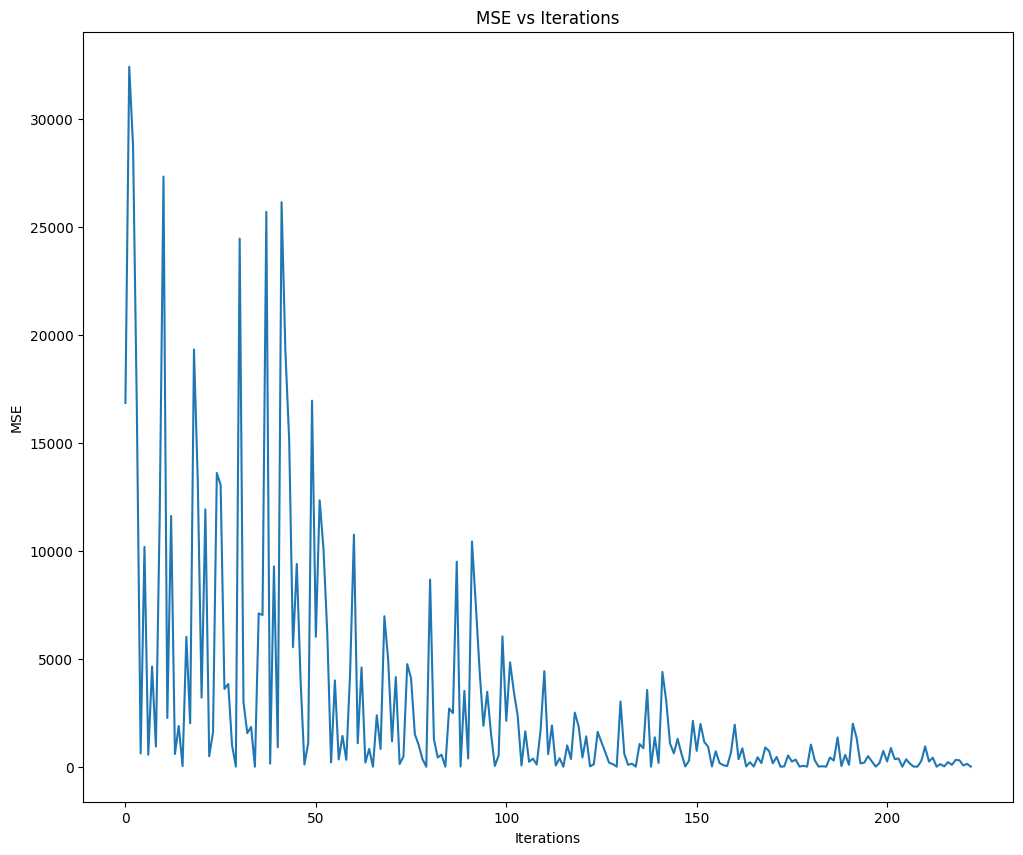

In [96]:
plt.figure(figsize = (12,10))
plt.plot(g[2])
plt.xlabel("Iterations")
plt.ylabel("MSE")
plt.title("MSE vs Iterations")
plt.show()